<a href="https://colab.research.google.com/github/FlorenceBoutin/GI_disease_detection/blob/ResNet50/florence_cnn_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build CNN model from trained models architecture

Create CNN models based on the structure of trained models

## Imports

In [18]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow import keras

from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import Sequential, layers
from keras.callbacks import EarlyStopping

from google.colab import drive

## Import data

In [19]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [20]:
drive_path = '/content/gdrive/My Drive/Colab Notebooks/GI_disease_detection/raw_data/'

In [21]:
train_folder = drive_path + 'train'
val_folder = drive_path + 'val'
test_folder = drive_path + 'test'

datagen = ImageDataGenerator(rescale = 1. / 255)
train_dataset = datagen.flow_from_directory(train_folder,
                                         target_size = (224, 224),
                                         color_mode = "rgb",
                                         batch_size = 32,
                                         class_mode = "categorical")

val_dataset = datagen.flow_from_directory(val_folder,
                                         target_size = (224, 224),
                                         color_mode = "rgb",
                                         batch_size = 32,
                                         class_mode = "categorical")

test_dataset = datagen.flow_from_directory(test_folder,
                                         target_size = (224, 224),
                                         color_mode = "rgb",
                                         batch_size = 32,
                                         class_mode = "categorical", 
                                         shuffle=False)

Found 2406 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


## Create model

In [22]:
recall = keras.metrics.Recall()
es = EarlyStopping(patience=10, restore_best_weights=True)
es_recall = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_recall_1', mode='max')
adam_opt = optimizers.Adam(learning_rate=0.0001)
adam_opt_1 = optimizers.Adam(learning_rate=0.01)
adam_opt_2 = optimizers.Adam(learning_rate=0.005)
adam_opt_3 = optimizers.Adam(learning_rate=1)

### VGG16

#### Model 1:

In [ ]:
model_vgg_1 = Sequential()

model_vgg_1.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3)))
model_vgg_1.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model_vgg_1.add(layers.MaxPooling2D((2,2)))

model_vgg_1.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.MaxPooling2D((2,2)))

model_vgg_1.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.MaxPooling2D((2,2)))

model_vgg_1.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.MaxPooling2D((2,2)))

model_vgg_1.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_1.add(layers.MaxPooling2D((2,2)))

model_vgg_1.add(layers.Flatten())
model_vgg_1.add(layers.Dense(4096, activation='relu'))
model_vgg_1.add(layers.Dense(4096, activation='relu'))
model_vgg_1.add(layers.Dense(3, activation='softmax'))

model_vgg_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [ ]:
model_vgg_1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=[recall, 'accuracy'])

In [ ]:
model_vgg_1.fit(train_dataset,
                epochs=20,
                callbacks=[es],
                validation_data=val_dataset)

Epoch 1/20
76/76 [==============================] - 55s 656ms/step - loss: 1.1431 - recall_1: 0.0108 - accuracy: 0.3180 - val_loss: 1.0987 - val_recall_1: 0.0000e+00 - val_accuracy: 0.3333
Epoch 2/20
76/76 [==============================] - 50s 655ms/step - loss: 1.0992 - recall_1: 0.0000e+00 - accuracy: 0.3188 - val_loss: 1.0986 - val_recall_1: 0.0000e+00 - val_accuracy: 0.3333
Epoch 3/20
76/76 [==============================] - 49s 644ms/step - loss: 1.0987 - recall_1: 0.0000e+00 - accuracy: 0.3308 - val_loss: 1.0986 - val_recall_1: 0.0000e+00 - val_accuracy: 0.3333
Epoch 4/20
76/76 [==============================] - 49s 644ms/step - loss: 1.0988 - recall_1: 0.0000e+00 - accuracy: 0.3246 - val_loss: 1.0986 - val_recall_1: 0.0000e+00 - val_accuracy: 0.3333
Epoch 5/20
76/76 [==============================] - 49s 644ms/step - loss: 1.0987 - recall_1: 0.0000e+00 - accuracy: 0.3300 - val_loss: 1.0986 - val_recall_1: 0.0000e+00 - val_accuracy: 0.3333
Epoch 6/20
76/76 [=====================

Model 1:

In [ ]:
model_vgg_2 = Sequential()

model_vgg_2.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3)))
model_vgg_2.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model_vgg_2.add(layers.MaxPooling2D((2,2)))

model_vgg_2.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.MaxPooling2D((2,2)))

model_vgg_2.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.MaxPooling2D((2,2)))

model_vgg_2.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.MaxPooling2D((2,2)))

model_vgg_2.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg_2.add(layers.MaxPooling2D((2,2)))

model_vgg_2.add(layers.Flatten())
model_vgg_2.add(layers.Dense(4096, activation='relu'))
model_vgg_2.add(layers.Dense(4096, activation='relu'))
model_vgg_2.add(layers.Dense(3, activation='softmax'))

model_vgg_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [ ]:
model_vgg_2.compile(loss='categorical_crossentropy',
               optimizer=adam_opt_1,
               metrics=[recall, 'accuracy'])

In [ ]:
model_vgg_2.fit(train_dataset,
                epochs=50,
                callbacks=[es],
                validation_data=val_dataset)

Epoch 1/50
76/76 [==============================] - 55s 649ms/step - loss: 132925408.0000 - recall: 0.2117 - accuracy: 0.3545 - val_loss: 189.1189 - val_recall: 0.3333 - val_accuracy: 0.3333
Epoch 2/50
76/76 [==============================] - 49s 644ms/step - loss: 5.4434 - recall: 0.0574 - accuracy: 0.3308 - val_loss: 1.1040 - val_recall: 0.0000e+00 - val_accuracy: 0.3333
Epoch 3/50
76/76 [==============================] - 48s 634ms/step - loss: 1.1028 - recall: 0.0000e+00 - accuracy: 0.3325 - val_loss: 1.1016 - val_recall: 0.0000e+00 - val_accuracy: 0.3333
Epoch 4/50
76/76 [==============================] - 50s 652ms/step - loss: 1.1031 - recall: 0.0000e+00 - accuracy: 0.3333 - val_loss: 1.1002 - val_recall: 0.0000e+00 - val_accuracy: 0.3333
Epoch 5/50
76/76 [==============================] - 52s 685ms/step - loss: 1.1014 - recall: 0.0000e+00 - accuracy: 0.3254 - val_loss: 1.1023 - val_recall: 0.0000e+00 - val_accuracy: 0.3333
Epoch 6/50
76/76 [==============================] - 48s 6

### ResNet50

#### Without Data augmentation

In [23]:
# Cfg0 Block
cfg0_conv_input = keras.Input(shape=(56,56,64), name='cfg0_conv')
x = keras.layers.Conv2D(64, kernel_size=1, strides=1, activation='relu', padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (cfg0_conv_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=1, strides=1, padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

cfg0_conv_input_transform = keras.layers.Conv2D(256, kernel_size=1, strides=1, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (cfg0_conv_input)
cfg0_conv_input_op = keras.layers.BatchNormalization()(cfg0_conv_input_transform)
x = keras.layers.Add()([x, cfg0_conv_input_op])
cfg0_conv_output = keras.layers.ReLU()(x)

cfg0_conv = keras.Model(inputs=cfg0_conv_input, outputs=cfg0_conv_output, name='cfg0_conv')




cfg0_identity_input = keras.Input(shape=(56, 56, 256), name='cfg0_identity')
x = keras.layers.Conv2D(64, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (cfg0_identity_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Add()([x, cfg0_identity_input])
cfg0_identity_output = keras.layers.ReLU()(x)

cfg0_identity = keras.Model(inputs=cfg0_identity_input, outputs=cfg0_identity_output, name='cfg0_identity_p1')




cfg0_input = keras.Input(shape=(56, 56, 64), name='cfg0')
x = cfg0_conv(cfg0_input)
x = cfg0_identity(x)
cfg0_output = cfg0_identity(x)

cfg0 = keras.Model(inputs=cfg0_input, outputs=cfg0_output, name='cfg0_block')

In [24]:
# Cfg1 Block
cfg1_conv_input = keras.Input(shape=(56, 56, 256), name='cfg1_conv')
x = keras.layers.Conv2D(128, kernel_size=1, strides=2, activation='relu', padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (cfg1_conv_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(512, kernel_size=1, strides=1, padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

cfg1_conv_input_transform = keras.layers.Conv2D(512, kernel_size=1, strides=2, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (cfg1_conv_input)
cfg1_conv_input_output = keras.layers.BatchNormalization()(cfg1_conv_input_transform)
x = keras.layers.Add()([x, cfg1_conv_input_output])
cfg1_conv_output = keras.layers.ReLU()(x)

cfg1_conv = keras.Model(inputs=cfg1_conv_input, outputs=cfg1_conv_output, name='cfg1_conv')




cfg1_identity_input = keras.Input(shape=(28, 28, 512), name='cfg1_identity')
x = keras.layers.Conv2D(128, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (cfg1_identity_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(512, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Add()([x, cfg1_identity_input])
cfg1_identity_output = keras.layers.ReLU()(x)

cfg1_identity = keras.Model(inputs=cfg1_identity_input, outputs=cfg1_identity_output, name='cfg1_identity_p1')


cfg1_input = keras.Input(shape=(56, 56, 256), name='cfg1')
x = cfg1_conv(cfg1_input)
x = cfg1_identity(x)
x = cfg1_identity(x)
cfg1_output = cfg1_identity(x)

cfg1 = keras.Model(inputs=cfg1_input, outputs=cfg1_output, name='cfg1_block')

In [25]:
# Cfg2 Block
cfg2_conv_input = keras.Input(shape=(28, 28, 512), name='cfg2_conv')
x = keras.layers.Conv2D(256, kernel_size=1, strides=2, activation='relu', padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (cfg2_conv_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=3, strides=1, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(1024, kernel_size=1, strides=1, padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

cfg2_conv_input_transform = keras.layers.Conv2D(1024, kernel_size=1, strides=2, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (cfg2_conv_input)
cfg2_conv_input_output = keras.layers.BatchNormalization()(cfg2_conv_input_transform)
x = keras.layers.Add()([x, cfg2_conv_input_output])
cfg2_conv_output = keras.layers.ReLU()(x)

cfg2_conv = keras.Model(inputs=cfg2_conv_input, outputs=cfg2_conv_output, name='cfg2_conv')




cfg2_identity_input = keras.Input(shape=(14, 14, 1024), name='cfg2_identity')
x = keras.layers.Conv2D(256, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (cfg2_identity_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(1024, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Add()([x, cfg2_identity_input])
cfg2_identity_output = keras.layers.ReLU()(x)

cfg2_identity = keras.Model(inputs=cfg2_identity_input, outputs=cfg2_identity_output, name='cfg2_identity_p1')


cfg2_input = keras.Input(shape=(28, 28, 512), name='cfg2')
x = cfg2_conv(cfg2_input)
x = cfg2_identity(x)
x = cfg2_identity(x)
x = cfg2_identity(x)
x = cfg2_identity(x)
cfg2_output = cfg2_identity(x)

cfg2 = keras.Model(inputs=cfg2_input, outputs=cfg2_output, name='cfg2_block')

In [26]:
# Cfg3 Block
cfg3_conv_input = keras.Input(shape=(14, 14, 1024), name='cfg3_conv')
x = keras.layers.Conv2D(512, kernel_size=1, strides=2, activation='relu', padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (cfg3_conv_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(512, kernel_size=3, strides=1, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(2048, kernel_size=1, strides=1, padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

cfg3_conv_input_transform = keras.layers.Conv2D(2048, kernel_size=1, strides=2, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (cfg3_conv_input)
cfg3_conv_input_output = keras.layers.BatchNormalization()(cfg3_conv_input_transform)
x = keras.layers.Add()([x, cfg3_conv_input_output])
cfg3_conv_output = keras.layers.ReLU()(x)

cfg3_conv = keras.Model(inputs=cfg3_conv_input, outputs=cfg3_conv_output, name='cfg3_conv')




cfg3_identity_input = keras.Input(shape=(7, 7, 2048), name='cfg3_identity')
x = keras.layers.Conv2D(512, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (cfg3_identity_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(512, kernel_size=3, strides=1, padding='same', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(2048, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Add()([x, cfg3_identity_input])
cfg3_identity_output = keras.layers.ReLU()(x)

cfg3_identity = keras.Model(inputs=cfg3_identity_input, outputs=cfg3_identity_output, name='cfg3_identity_p1')


cfg3_input = keras.Input(shape=(14, 14, 1024), name='cfg3')
x = cfg3_conv(cfg3_input)
x = cfg3_identity(x)
cfg3_output = cfg3_identity(x)

cfg3 = keras.Model(inputs=cfg3_input, outputs=cfg3_output, name='cfg3_block')

In [27]:
# Classifier block
classifier_input = keras.Input(shape=(7, 7, 2048), name='classifier')
x = keras.layers.AveragePooling2D(pool_size=2, padding='same')(classifier_input)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Flatten()(x)
classifier_output = keras.layers.Dense(3, activation='softmax', kernel_constraint=keras.constraints.max_norm(2.))(x)

classifier = keras.Model(inputs=classifier_input, outputs=classifier_output, name='classifier')

In [ ]:
# Build model
def build_resnet_model():
    resnet_input = keras.Input(shape=(224, 224, 3), name='input')
    #x = imageAug(resnet_input)
    x = keras.layers.Conv2D(64, kernel_size=7, activation='relu', padding='same', strides=2, kernel_constraint=keras.constraints.max_norm(2.))(resnet_input)
    conv1_output = keras.layers.MaxPooling2D(pool_size=3, padding='same', strides=2) (x)
    x = cfg0(conv1_output)
    x = cfg1(x)
    x = cfg2(x)
    x = cfg3(x)
    model_output = classifier(x)
    resnet_model = keras.Model(inputs=resnet_input, outputs=model_output, name='resnet50')

    print(resnet_model.summary())

    resnet_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy', recall],
    )
    
    return resnet_model

model_resnet_1 = build_resnet_model()



Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_39 (Conv2D)          (None, 112, 112, 64)      9472      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 cfg0_block (Functional)     (None, 56, 56, 256)       148480    
                                                                 
 cfg1_block (Functional)     (None, 28, 28, 512)       665600    
                                                                 
 cfg2_block (Functional)     (None, 14, 14, 1024)      2641920   
                                                          

In [ ]:
history = model_resnet_1.fit(train_dataset,
                epochs=50,
                callbacks=[es_recall],
                validation_data=val_dataset)

Epoch 1/50
76/76 [==============================] - 69s 654ms/step - loss: 0.3446 - accuracy: 0.9526 - recall_1: 0.9526 - val_loss: 10.0513 - val_accuracy: 0.3260 - val_recall_1: 0.3260
Epoch 2/50
76/76 [==============================] - 50s 653ms/step - loss: 0.1272 - accuracy: 0.9780 - recall_1: 0.9776 - val_loss: 71.4006 - val_accuracy: 0.5013 - val_recall_1: 0.5013
Epoch 3/50
76/76 [==============================] - 48s 632ms/step - loss: 0.0806 - accuracy: 0.9846 - recall_1: 0.9846 - val_loss: 4.1335 - val_accuracy: 0.5747 - val_recall_1: 0.5747
Epoch 4/50
76/76 [==============================] - 50s 655ms/step - loss: 0.0268 - accuracy: 0.9938 - recall_1: 0.9938 - val_loss: 1.8472 - val_accuracy: 0.6900 - val_recall_1: 0.6880
Epoch 5/50
76/76 [==============================] - 48s 634ms/step - loss: 0.0139 - accuracy: 0.9975 - recall_1: 0.9975 - val_loss: 1.3280 - val_accuracy: 0.7327 - val_recall_1: 0.7320
Epoch 6/50
76/76 [==============================] - 49s 647ms/step - loss

In [ ]:
model_resnet_1.evaluate(test_dataset)

19/19 [==============================] - 7s 395ms/step - loss: 1.1391 - accuracy: 0.7550 - recall_1: 0.7550


[1.1391149759292603, 0.7549999952316284, 0.7549999952316284]

In [ ]:
predictions = model_resnet_1.predict(test_dataset)

19/19 [==============================] - 9s 402ms/step


In [ ]:
predictions = np.round(predictions, 0)

In [ ]:
predictions=pd.DataFrame(predictions)

In [ ]:
y_pred = np.array(predictions.idxmax(1))

In [ ]:
y_true = test_dataset.classes

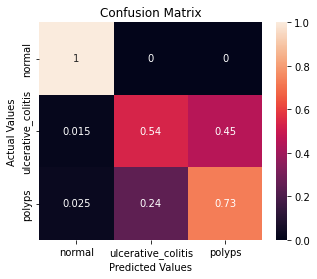

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_true, y_pred, normalize='true')
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['normal','ulcerative_colitis','polyps'], 
                     columns = ['normal','ulcerative_colitis','polyps'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### With Data augmentation

In [28]:
# Data Augmentation
imageAug = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomContrast(0.2)
])

In [29]:
recall

In [39]:
# Build model
def build_resnet_model_augmentation():
    resnet_input = keras.Input(shape=(224, 224, 3), name='input')
    x = imageAug(resnet_input)
    x = keras.layers.Conv2D(64, kernel_size=7, activation='relu', padding='same', strides=2, kernel_constraint=keras.constraints.max_norm(2.))(x)
    conv1_output = keras.layers.MaxPooling2D(pool_size=3, padding='same', strides=2) (x)
    x = cfg0(conv1_output)
    x = cfg1(x)
    x = cfg2(x)
    x = cfg3(x)
    model_output = classifier(x)
    resnet_model = keras.Model(inputs=resnet_input, outputs=model_output, name='resnet50')

    print(resnet_model.summary())

    resnet_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy', recall],
    )
    
    return resnet_model

model_resnet_2 = build_resnet_model_augmentation()


Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_60 (Conv2D)          (None, 112, 112, 64)      9472      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 cfg0_block (Functional)     (None, 56, 56, 256)       148480    
                                                                 
 cfg1_block (Functional)     (None, 28, 28, 512)       665600    
                                                          

In [40]:
es_recall_2 = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_recall_1', mode='max')

In [41]:
history = model_resnet_2.fit(train_dataset,
                epochs=50,
                callbacks=[es_recall_2],
                validation_data=val_dataset)

Epoch 1/50


76/76 [==============================] - 91s 911ms/step - loss: 1.3574 - accuracy: 0.7722 - recall_1: 0.6329 - val_loss: 56.1326 - val_accuracy: 0.2513 - val_recall_1: 0.2513
Epoch 2/50
76/76 [==============================] - 68s 893ms/step - loss: 1.2771 - accuracy: 0.7884 - recall_1: 0.7880 - val_loss: 8.2975 - val_accuracy: 0.3553 - val_recall_1: 0.3553
Epoch 3/50
76/76 [==============================] - 68s 894ms/step - loss: 0.6645 - accuracy: 0.8362 - recall_1: 0.8362 - val_loss: 6.9860 - val_accuracy: 0.3973 - val_recall_1: 0.3973
Epoch 4/50
76/76 [==============================] - 67s 884ms/step - loss: 0.9421 - accuracy: 0.8192 - recall_1: 0.8180 - val_loss: 41.9963 - val_accuracy: 0.3313 - val_recall_1: 0.3313
Epoch 5/50
76/76 [==============================] - 71s 939ms/step - loss: 0.7744 - accuracy: 0.8150 - recall_1: 0.8142 - val_loss: 20.6457 - val_accuracy: 0.3333 - val_recall_1: 0.3333
Epoch 6/50
76/76 [==============================] - 68s 890ms/step - loss: 0.8464 -

In [42]:
model_resnet_2.evaluate(test_dataset)

19/19 [==============================] - 351s 19s/step - loss: 20.3423 - accuracy: 0.4317 - recall_1: 0.4317


[20.34231948852539, 0.43166667222976685, 0.43166667222976685]

In [43]:
predictions = model_resnet_2.predict(test_dataset)
predictions = np.round(predictions, 0)
predictions=pd.DataFrame(predictions)
y_pred = np.array(predictions.idxmax(1))
y_true = test_dataset.classes

19/19 [==============================] - 10s 483ms/step


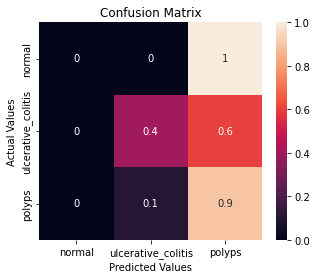

In [44]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_true, y_pred, normalize='true')
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['normal','ulcerative_colitis','polyps'], 
                     columns = ['normal','ulcerative_colitis','polyps'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### EfficientNetB3

### LeNet5

### AlexNet

### GoogLeNet